# Titanic Uçtan Uca Feature Engineering & Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from statsmodels.stats.proportion import proportions_ztest

In [2]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
df = load()

In [7]:
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns = [col.upper() for col in df.columns]

In [10]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Feature Engineering (Değişken Mühendisliği)

In [11]:
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')

In [12]:
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

In [13]:
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

In [14]:
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [15]:
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

In [17]:
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [18]:
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"

In [19]:
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

In [20]:
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [21]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


In [22]:
df.shape

(891, 22)

In [23]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [24]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

# 2. Outliers (Aykırı Değerler)

In [31]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df, "AGE")
outlier_thresholds(df, "FARE")

low, up = outlier_thresholds(df, "FARE")

df[(df["FARE"] < low) | (df["FARE"] > up)].head()


df[(df["FARE"] < low) | (df["FARE"] > up)].index

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "AGE")
check_outlier(df, "FARE")

True

In [33]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


# 3. Missing Values (Eksik Değerler)

In [35]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

missing_values_table(df, True)

                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22
                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


['AGE', 'CABIN', 'EMBARKED', 'NEW_AGE_PCLASS', 'NEW_AGE_CAT', 'NEW_SEX_CAT']

In [36]:
missing_values_table(df)

                n_miss  ratio
CABIN              687  77.10
AGE                177  19.87
NEW_AGE_PCLASS     177  19.87
NEW_AGE_CAT        177  19.87
NEW_SEX_CAT        177  19.87
EMBARKED             2   0.22


In [37]:
df.drop("CABIN", inplace=True, axis=1)

In [38]:
remove_cols = ["TICKET", "NAME"]

In [39]:
df.drop(remove_cols, inplace=True, axis=1)

In [40]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [41]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [42]:
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

In [43]:
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [44]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [45]:
df

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,male,22.0,1,0,7.2500,S,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,female,38.0,1,0,71.2833,C,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,female,26.0,0,0,7.9250,S,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,female,35.0,1,0,53.1000,S,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,male,35.0,0,0,8.0500,S,0,24,4,0,Mr,1,105.0,YES,mature,maturemale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,21,3,0,Rev,1,54.0,YES,mature,maturemale
887,888,1,1,female,19.0,0,0,30.0000,S,1,28,4,0,Miss,1,19.0,YES,mature,youngfemale
888,889,0,3,female,21.0,1,2,23.4500,S,0,40,5,0,Miss,4,63.0,NO,mature,youngfemale
889,890,1,1,male,26.0,0,0,30.0000,C,1,21,4,0,Mr,1,26.0,YES,mature,maturemale


# 4. Label Encoding

In [47]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df = load()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

In [48]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

# 5. Rare Encoding

**IN** 

rare_analyser(df, "SURVIVED", cat_cols)


df = rare_encoder(df, 0.01)

df["NEW_TITLE"].value_counts()

**OUT**

rare_analyser(df, "SURVIVED", cat_cols)
​
​
df = rare_encoder(df, 0.01)
​
df["NEW_TITLE"].value_counts()
SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


NEW_AGE_CAT : 3
        COUNT  RATIO  TARGET_MEAN
mature    735  0.825        0.363
senior     39  0.044        0.308
young     117  0.131        0.538


NEW_SEX_CAT : 6
              COUNT  RATIO  TARGET_MEAN
maturefemale    172  0.193        0.779
maturemale      401  0.450        0.175
seniorfemale     22  0.025        0.909
seniormale       52  0.058        0.135
youngfemale     120  0.135        0.658
youngmale       124  0.139        0.258


SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


PCLASS : 3
   COUNT  RATIO  TARGET_MEAN
1    216  0.242        0.630
2    184  0.207        0.473
3    491  0.551        0.242


SIBSP : 7
   COUNT  RATIO  TARGET_MEAN
0    608  0.682        0.345
1    209  0.235        0.536
2     28  0.031        0.464
3     16  0.018        0.250
4     18  0.020        0.167
5      5  0.006        0.000
8      7  0.008        0.000


PARCH : 7
   COUNT  RATIO  TARGET_MEAN
0    678  0.761        0.344
1    118  0.132        0.551
2     80  0.090        0.500
3      5  0.006        0.600
4      4  0.004        0.000
5      5  0.006        0.200
6      1  0.001        0.000


NEW_CABIN_BOOL : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


NEW_NAME_WORD_COUNT : 8
    COUNT  RATIO  TARGET_MEAN
3     305  0.342        0.292
4     388  0.435        0.340
5      96  0.108        0.427
6      53  0.059        0.774
7      38  0.043        0.842
8       9  0.010        0.556
9       1  0.001        1.000
14      1  0.001        1.000


NEW_NAME_DR : 2
   COUNT  RATIO  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


NEW_FAMILY_SIZE : 9
    COUNT  RATIO  TARGET_MEAN
1     537  0.603        0.304
2     161  0.181        0.553
3     102  0.114        0.578
4      29  0.033        0.724
5      15  0.017        0.200
6      22  0.025        0.136
7      12  0.013        0.333
8       6  0.007        0.000
11      7  0.008        0.000


Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

# 6. One-Hot Encoding

In [62]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = load()

# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


In [63]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [64]:
df = one_hot_encoder(df, ohe_cols)

In [65]:
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df.shape

(891, 24)

# 7. Standart Scaler

In [71]:
scaler = StandardScaler()

In [72]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [73]:
df[num_cols].head()

,PassengerId,Age,Fare
0,-1.730108,-0.530377,-0.502445
1,-1.726220,0.571831,0.786845
2,-1.722332,-0.254825,-0.488854
3,-1.718444,0.365167,0.420730
4,-1.714556,0.365167,-0.486337


In [74]:
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,-1.730108,0,"Braund, Mr. Owen Harris",male,-0.530377,A/5 21171,-0.502445,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-1.726220,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,PC 17599,0.786845,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.722332,1,"Heikkinen, Miss. Laina",female,-0.254825,STON/O2. 3101282,-0.488854,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-1.718444,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,113803,0.420730,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-1.714556,0,"Allen, Mr. William Henry",male,0.365167,373450,-0.486337,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


In [75]:
df.shape

(891, 24)

# 8. Model

In [77]:
y = df["Survived"]
X = df.drop(["PassengerId", "Survived"], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [82]:
from sklearn.ensemble import RandomForestClassifier

**IN**

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

**OUT**

0.8059701492537313

In [84]:
dff = load()
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

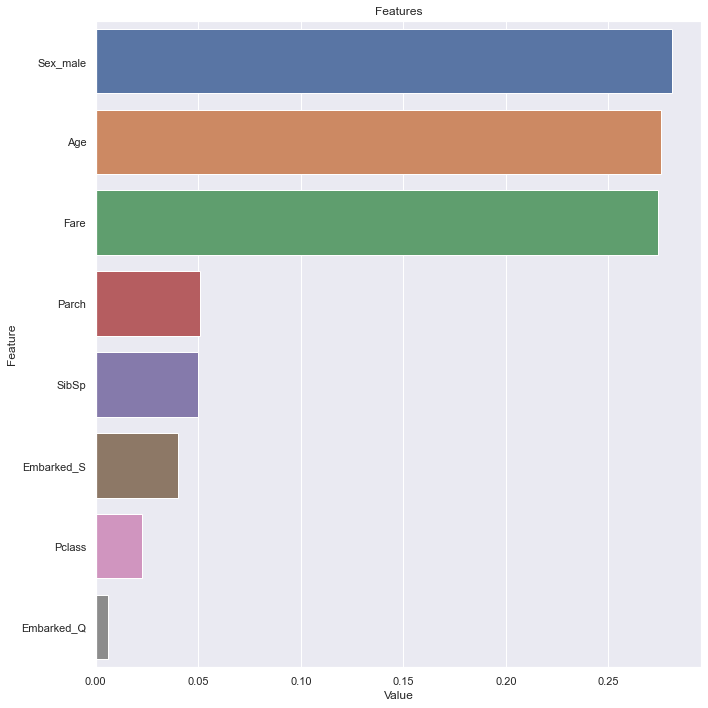

In [85]:
# Yeni ürettiğimiz değişkenler ne alemde?
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)